In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import cv2
import matplotlib.pyplot as plt

In [9]:
from srn import srn
handpose = srn.handpose

In [4]:
ESSAI = './dataset/gesture_1/finger_1/subject_1/essai_1/'

In [5]:
params = 615.866, 615.866, 316.584, 228.38
fx, fy, cx, cy = params

In [48]:
true_I = np.loadtxt(f'{ESSAI}/skeletons_image.txt', dtype=np.float16)
true_W = np.loadtxt(f'{ESSAI}/skeletons_world.txt', dtype=np.float16)

true_I = true_I.reshape((-1, 22, 2))
# true_I = np.delete(I, 1, 1) # 3, 4

true_W = true_W.reshape((-1, 22, 3))
# true_W = np.delete(W, 1, 1) # 4, 5, 6

true_I.shape, true_W.shape

((95, 22, 2), (95, 22, 3))

In [7]:
frame = 0
d = cv2.imread(ESSAI + f'/{frame}_depth.png', cv2.IMREAD_ANYDEPTH)

In [10]:
world, img = handpose.run(ESSAI)

In [16]:
world

array([[[-44.02487 ,  79.43333 , 633.27106 ],
        [-31.983786,  82.72307 , 636.5479  ],
        [-13.239857,  18.833956, 608.4881  ],
        ...,
        [-64.96221 ,  23.863213, 572.8618  ],
        [-58.915855,  28.159128, 563.31366 ],
        [-48.83671 ,  37.121063, 565.52716 ]],

       [[-44.902775,  78.5742  , 630.8891  ],
        [-33.74222 ,  81.856995, 634.32324 ],
        [-14.12681 ,  19.447733, 607.2427  ],
        ...,
        [-64.92628 ,  19.521172, 570.45386 ],
        [-61.191868,  19.743114, 555.8712  ],
        [-52.551277,  27.633883, 552.04297 ]],

       [[-45.808506,  75.24219 , 628.06885 ],
        [-34.669163,  79.144775, 630.7123  ],
        [-12.65472 ,  18.025774, 602.3096  ],
        ...,
        [-63.78095 ,  19.822386, 570.5254  ],
        [-60.181652,  22.02808 , 559.65106 ],
        [-52.67655 ,  29.407507, 559.47534 ]],

       ...,

       [[-52.199684, 105.715485, 623.15533 ],
        [-42.140026, 110.79467 , 623.296   ],
        [-25.76406 ,  

In [12]:
img

array([[[273.76913, 305.63016, 633.27106],
        [285.6394 , 308.41534, 636.5479 ],
        [303.18362, 247.44232, 608.4881 ],
        ...,
        [246.74515, 254.0346 , 572.8618 ],
        [252.17181, 259.16614, 563.31366],
        [263.40024, 268.8053 , 565.52716]],

       [[272.7505 , 305.08316, 630.8891 ],
        [283.8236 , 307.85516, 634.32324],
        [302.2566 , 248.10391, 607.2427 ],
        ...,
        [246.48915, 249.4552 , 570.45386],
        [248.78775, 250.25398, 555.8712 ],
        [257.95715, 259.2087 , 552.04297]],

       [[271.66553, 302.1603 , 628.06885],
        [282.73093, 305.6618 , 630.7123 ],
        [303.64447, 246.8115 , 602.3096 ],
        ...,
        [247.73428, 249.77771, 570.5254 ],
        [250.35733, 252.62073, 559.65106],
        [258.59808, 260.75156, 559.47534]],

       ...,

       [[264.99493, 332.8589 , 623.15533],
        [274.94632, 337.85394, 623.296  ],
        [290.1859 , 285.14673, 601.07385],
        ...,
        [237.57681, 281.11

## Note 1

If you add cx, cy to world coordinates, you get same image coodinates

In [19]:
t = world[0].copy()
t[:,0] = t[:,0] + cx
t[:,1] = t[:,1] + cy
t

array([[272.55914, 307.81332, 633.27106],
       [284.60022, 311.1031 , 636.5479 ],
       [303.34415, 247.21396, 608.4881 ],
       [284.15158, 248.79288, 604.32635],
       [268.1552 , 251.72897, 602.41235],
       [251.05995, 256.44714, 600.4888 ],
       [294.3551 , 291.10193, 585.39923],
       [302.32925, 278.9815 , 553.4321 ],
       [312.26816, 270.8068 , 529.8667 ],
       [304.20663, 217.42207, 575.2278 ],
       [304.76578, 201.69807, 551.82904],
       [308.26456, 194.12634, 538.1719 ],
       [279.00964, 231.84659, 561.8853 ],
       [279.18835, 251.35594, 563.07935],
       [279.67932, 268.11847, 574.0481 ],
       [259.7714 , 237.99396, 564.09937],
       [265.6098 , 249.7295 , 559.4187 ],
       [274.25372, 260.24457, 564.2487 ],
       [251.6218 , 252.24323, 572.8618 ],
       [257.66815, 256.53912, 563.31366],
       [267.7473 , 265.50107, 565.52716]], dtype=float32)

In [20]:
img[0]

array([[273.76913, 305.63016, 633.27106],
       [285.6394 , 308.41534, 636.5479 ],
       [303.18362, 247.44232, 608.4881 ],
       [283.5323 , 249.18266, 604.32635],
       [267.07367, 252.25043, 602.41235],
       [249.38202, 257.1659 , 600.4888 ],
       [293.1982 , 294.36624, 585.39923],
       [300.72113, 284.68997, 553.4321 ],
       [311.5677 , 277.6928 , 529.8667 ],
       [303.3322 , 216.64792, 575.2278 ],
       [303.39432, 198.60178, 551.82904],
       [307.0635 , 189.18126, 538.1719 ],
       [275.39984, 232.17963, 561.8853 ],
       [275.68265, 253.50986, 563.07935],
       [276.9909 , 271.0133 , 574.0481 ],
       [254.55777, 238.87622, 564.09937],
       [260.4663 , 251.88374, 559.4187 ],
       [270.38138, 263.15952, 564.2487 ],
       [246.74515, 254.0346 , 572.8618 ],
       [252.17181, 259.16614, 563.31366],
       [263.40024, 268.8053 , 565.52716]], dtype=float32)

In [22]:
np.average(np.abs(t - img[0])) # Average error in pixels

1.6176791

## Note 2
x axis is inverted in their outputs

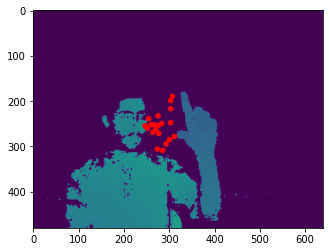

In [23]:
plt.imshow(d)
for x, y, z in img[0]:
    c = plt.Circle((x, y), color='red')
    plt.gca().add_patch(c)
plt.show()

Mirror it on x = 320, by doing new_x = 640 - x

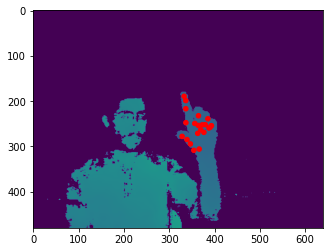

In [24]:
plt.imshow(d)
for x, y, z in img[0]:
    c = plt.Circle((640 - x, y), color='red')
    plt.gca().add_patch(c)
plt.show()

This output is better than the code before with center and cube modifications.

In [31]:
predicted_uvd = img[0].copy() # predicted uvd of frame 0 of essai 1
predicted_uvd[:,0] = 640 - predicted_uvd[:,0] # mirror it
predicted_uvd # inverted

array([[366.23087, 305.63016, 633.27106],
       [354.3606 , 308.41534, 636.5479 ],
       [336.81638, 247.44232, 608.4881 ],
       [356.4677 , 249.18266, 604.32635],
       [372.92633, 252.25043, 602.41235],
       [390.61798, 257.1659 , 600.4888 ],
       [346.8018 , 294.36624, 585.39923],
       [339.27887, 284.68997, 553.4321 ],
       [328.4323 , 277.6928 , 529.8667 ],
       [336.6678 , 216.64792, 575.2278 ],
       [336.60568, 198.60178, 551.82904],
       [332.9365 , 189.18126, 538.1719 ],
       [364.60016, 232.17963, 561.8853 ],
       [364.31735, 253.50986, 563.07935],
       [363.0091 , 271.0133 , 574.0481 ],
       [385.44223, 238.87622, 564.09937],
       [379.5337 , 251.88374, 559.4187 ],
       [369.61862, 263.15952, 564.2487 ],
       [393.25485, 254.0346 , 572.8618 ],
       [387.8282 , 259.16614, 563.31366],
       [376.59976, 268.8053 , 565.52716]], dtype=float32)

In [34]:
true_uvd = true_I[0].copy() # actual uvd of frame 0 of essai 1
true_uvd

array([[367.8, 319.8],
       [355.8, 299.5],
       [345.5, 286. ],
       [334.8, 268.8],
       [336.5, 249.4],
       [335. , 217.1],
       [335.5, 208.8],
       [335.5, 198. ],
       [354.5, 246.9],
       [353.5, 221. ],
       [357.5, 236.5],
       [359.8, 253.1],
       [371. , 246. ],
       [376.2, 232.4],
       [376.8, 250. ],
       [374.2, 262.8],
       [390.2, 249.4],
       [391.8, 252.1],
       [392.8, 266.8],
       [390. , 275. ]], dtype=float16)